# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [166]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [167]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [168]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [169]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [170]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [171]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [172]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [173]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [174]:

# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())


user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [175]:
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?
---
En users se puede ver que hay 2 columnas con problemas en sus datos, siendo 'city' con un 11.7% de dayos nulos y 'churn_date'con 88.3% de datos nulos, por lo que se tienen que revisar la columna 'city' para imputar o eliminar las filas con Nan y eliminar o ignorar totalmente la columna 'churn_date', en lo personal eliminaria la columna 'churn_date' para no manejar datos inutiles y dejaria como nulos los datos faltantes de 'city' al ser dificil de imputar.
Por su parte en usage son 3 las columnas con problemas, siendo 'date' con un 0.12%, 'duration' con un 55.2% y 'length' con un 44.7%, por lo quese debe imputar o dejar como nulos dependiendo de la utilidad y el alcance de los datos, en este caso se podrian imputar los datos de 'duration' y de 'length' con la media si los datos tienen un comportamiento normla y con la mediana de tener algun tipo de sesgo.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [176]:
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` cuenta con datos bien distribuidos y no da señales de outliers o posibles datos de control
- La columna `age` indica que existe un dato de control '-999' por lo que se debe cambiar para evitar problemas con las medidas estadisticas

In [177]:
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` se encuentran con datos correctos yno dan señales de problemas
- Las columnas 'duration' y 'length' cuetan con valores atipicos muy altos que no reflejan el comportamiento normal con respecto a los otros datos por lo que deben tener un sesgo a la derecha y toca revisar que se hace con los outliers

In [178]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


In [179]:
(users['city'].unique(), users['plan'].unique())

(array(['Medellín', '?', 'CDMX', 'Bogotá', 'GDL', 'MTY', nan, 'Cali'],
       dtype=object),
 array(['Basico', 'Premium'], dtype=object))

- La columna `city` cuenta con menos datos de los esperados, tambien señala que existen 7 categorias diferentes donde 'Bogota' es la moda
- La columna `plan` nos muestra que la mayoria de datos de plan viene de 'Basico' siendo que solo hay 2 opciones

In [180]:
# explorar columna categórica de usage
(usage['type'].describe(), usage['type'].unique())

(count     40000
 unique        2
 top        text
 freq      22092
 Name: type, dtype: object,
 array(['call', 'text'], dtype=object))

- La columna `type` muestra que la mayoria de datos en la columna son de 'text' aunque no por una gran diferencia, siendo que solo hay 2 opciones

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?
---
Se encontraron 2 sentinels, uno en 'users' donde aparece '-999' como indicativo y el otro en 'usage' donde aparece '?', tambien se vieron invalidos en las columnas 'duration', 'length' y 'city' donde aparecias valores muy diferentes a otros datos y falta de informacion.
Para empezar se debe cambiar el sentinel identiciado por Nan para facilitar su manejo y evitar distorcionar los datos, despues se debe revisar cuantos datos outliers estan presentes y eliminarlos o imputarlos.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [181]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [182]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [183]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.unique()

array([2022, 2026, 2023, 2024])

En `reg_date`, existen datos imposibles en 2026 por lo que se debe analizar que pudo pasar y tratar estos datos

In [184]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.unique()

array([2024.,   nan])

En `date`, se puede ver que solo ahy datos del 2024 y datos nulos, por lo que no hay imposibles pero si se deben tartar los valores Nan.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?
---
En users existen datos de año 2026, lo que es imposibles, por lo que se eliminar para evitar errores al medir tendencias u otras metricas que precisen esta informacion correcta.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [185]:

# Reemplazar -999 por la mediana de age
users['age']= users['age'].replace(-999, np.nan)
age_mediana = users['age'].median()
users['age'] = users['age'].fillna(age_mediana)
# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [186]:
# Reemplazar ? por NA en city
users['city']= users['city'].replace("?", np.nan)
# Verificar cambios
users['city'].unique()

array(['Medellín', nan, 'CDMX', 'Bogotá', 'GDL', 'MTY', 'Cali'],
      dtype=object)

In [187]:

# Marcar fechas futuras como NA para reg_date
users['reg_date'] = pd.to_datetime(np.where(users['reg_date'].dt.year > 2024, pd.NaT, users['reg_date']))
# Verificar cambios
users['reg_date'].dt.year.unique()


array([2022.,   nan, 2023., 2024.])

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [188]:
# Verificación MAR en usage (Missing At Random) para duration
nulos_por_tipo = usage.groupby('type')[['duration']].apply(lambda x: x.isna().mean())
print(nulos_por_tipo)

      duration
type          
call  0.000000
text  0.999276


In [189]:
# Verificación MAR en usage (Missing At Random) para length
nulos_por_tipo = usage.groupby('type')[['length']].apply(lambda x: x.isna().mean())
print(nulos_por_tipo)

       length
type         
call  0.99933
text  0.00000


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
Se puede ver claramente que las dos columnas son MAR, por lo que los nulos de 'duration' dependen del tipo 'text' y los de 'length' dependen de 'call'
Por lo que es correcto interpretar que cada tipo tiene su unidad demedicion y no pueden combinarse sin perder coherencia, siendo el caso que se deben dejar los nulos

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [190]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas
usage["call_min"] = np.where(
    (usage["type"] == "call") & (usage["duration"].notna()),
    usage["duration"],
    0
)

# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'call_min': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,call_min
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [191]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [192]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [193]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,3999.000000,3999.000000,3999.000000
mean,11999.500000,48.136000,5.524381,4.478120,22.836934
std,1154.844867,17.689919,2.358416,2.144238,16.590213
min,10000.000000,18.000000,0.000000,0.000000,0.000000
25%,10999.750000,33.000000,4.000000,3.000000,11.095000
50%,11999.500000,48.000000,5.000000,4.000000,19.740000
75%,12999.250000,63.000000,7.000000,6.000000,31.185000
max,13999.000000,79.000000,17.000000,15.000000,155.690000


In [194]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

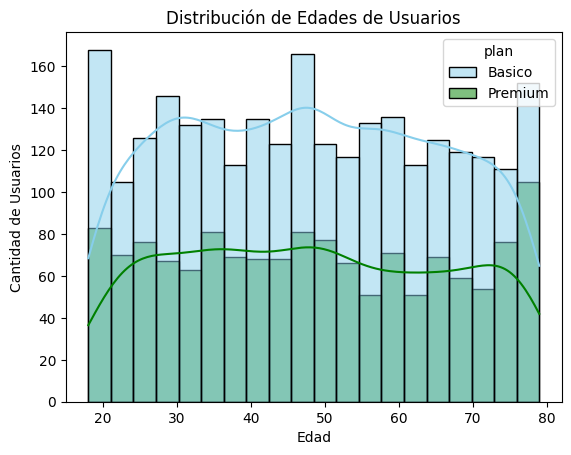

In [215]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', kde=True, hue='plan', palette=['skyblue', 'green'], bins=20)
plt.title('Distribución de Edades de Usuarios')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()

💡Insights: 
- Distribución semejante a la normal donde se presentan 3 picos de cantidad de usuarios a a los 20, 47 y 77 años.

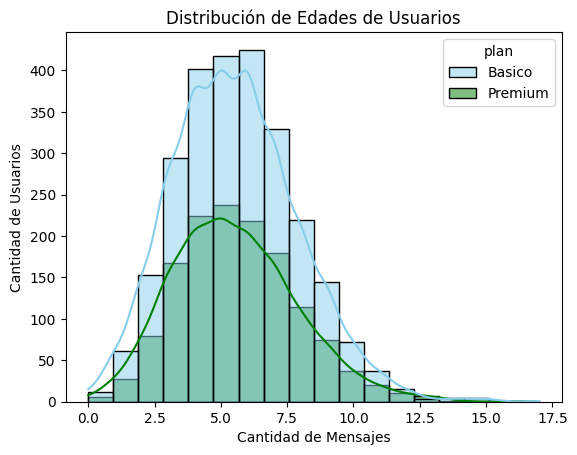

In [196]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', kde=True, hue='plan', palette=['skyblue', 'green'], bins=18)
plt.title('Distribución de Edades de Usuarios')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Cantidad de Usuarios')
plt.show()

💡Insights: 
- La distribucion es normal con un pequeño sesgo a la derecha, y muestran un comportamiento semejante en el plan basico y premium con la diferencia de cantidad

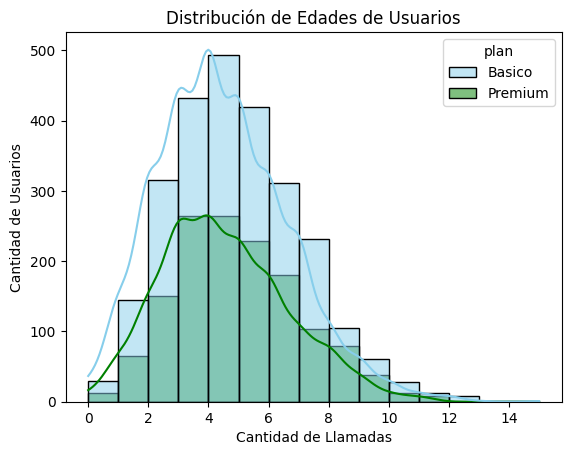

In [197]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', kde=True, hue='plan', palette=['skyblue', 'green'], bins=15)
plt.title('Distribución de Edades de Usuarios')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Cantidad de Usuarios')
plt.show()

💡Insights: 
- Distribución semejante a la normal con sesgo a la derecha y que sigue el comportamiento entre el plan basico y premium con ligeras diferencias en los picos

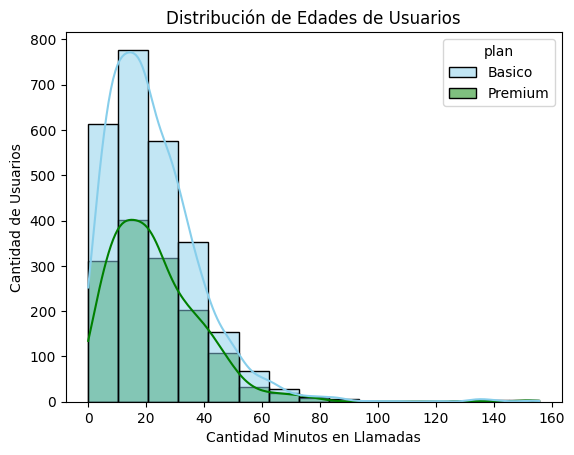

In [198]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', kde=True, hue='plan', palette=['skyblue', 'green'], bins=15)
plt.title('Distribución de Edades de Usuarios')
plt.xlabel('Cantidad Minutos en Llamadas')
plt.ylabel('Cantidad de Usuarios')
plt.show()

💡Insights: 
- Distribucion similar a la normal co nun gran sesgo a la derecha que indica un numero bajo de usuarios que se demoran una gran cantidad de tiempo en sus llamadas sin se datos inusuales

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

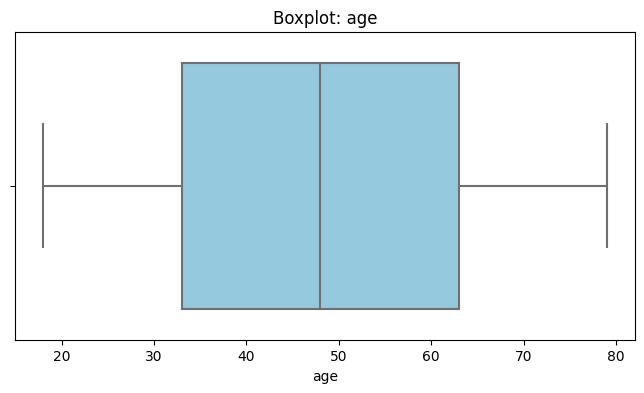

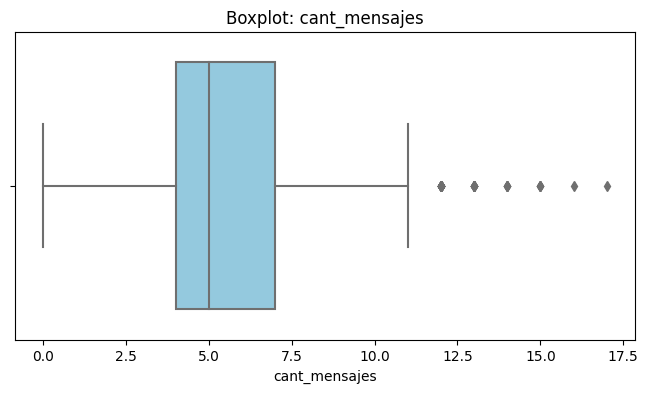

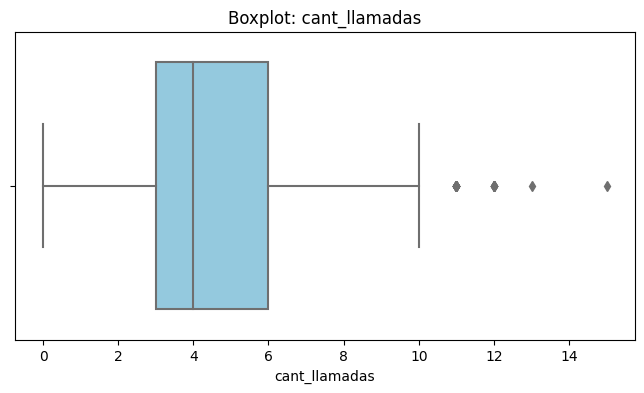

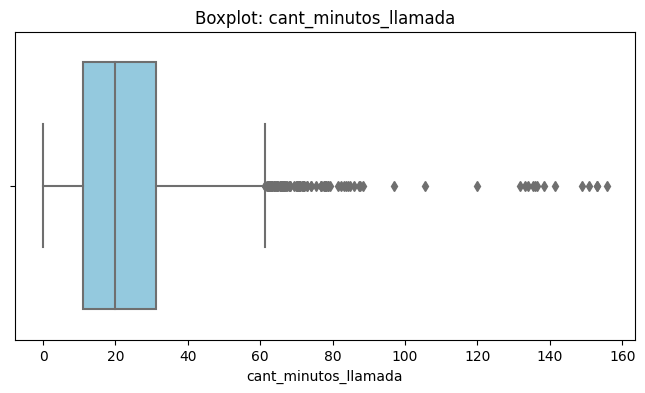

In [199]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=user_profile, x=col, color='skyblue')
    
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡Insights: 
- Age: No presenta outliers, los datos se encuetran entre los datos esperados y su distribucion no se sale del boxplot
- cant_mensajes: Se presentan pocos outliers que no parecen errores, sino un comportamiento especifico de los usuarios mas activos por este medio
- cant_llamadas: Se presentan pocos outliers que no tienen problema al evidenciar un comportamiento logico de los usuarios que mas lo utilizan
- cant_minutos_llamada: Se presentan muchos outliers, los cuales empiezan a ser llamativos al ser datos tangrandes con una mediana tan baja y con una cantidad de llamadas tambien baja

In [200]:
# Calcular límites con el método IQR
columnas_limites = {}
for col in columnas_numericas:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - (1.5 * IQR)
    limite_superior = Q3 + (1.5 * IQR)
    limite_inferior_EX = Q1 - (3 * IQR)
    limite_superior_EX = Q3 + (3 * IQR)
    if limite_inferior < 0:
        limite_inferior = 0
    if limite_inferior_EX < 0:
        limite_inferior_EX = 0    
    columnas_limites[col] = [limite_inferior, limite_superior,limite_inferior_EX, limite_superior_EX]

print("Límites calculados:")
print(columnas_limites)

Límites calculados:
{'age': [0, 108.0, 0, 153.0], 'cant_mensajes': [0, 11.5, 0, 16.0], 'cant_llamadas': [0, 10.5, 0, 15.0], 'cant_minutos_llamada': [0, 61.31999999999999, 0, 91.455]}


In [201]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,22.836934
std,17.689919,2.358416,2.144238,16.590213
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.095000
50%,48.000000,5.000000,4.000000,19.740000
75%,63.000000,7.000000,6.000000,31.185000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: Al ser un numero bajo que indica solamente el comportamiento de unos usuarios, se deben mantener para representar correctamente el comportamiento de los usuarios y no sale de los limites extremos maximos o minimos
- cant_llamadas: Al ser un numero bajo que indica solamente el comportamiento de unos usuarios, se deben mantener para representar correctamente el comportamiento de los usuarios y no sale de los limites extremos maximos o minimos
- cant_minutos_llamada: Para evitar problemas con los calculos se deberian imputar los valores al valor limite superior maximo y asi tener una constancia de los perfiles tan altos con ese comportamiento aunque sean minoria en terminos generales

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [204]:
# Crear columna grupo_uso
def clasificar_usuario_U(row):
    if row['cant_llamadas'] < 5 and row['cant_mensajes'] < 5:
        return 'Bajo uso'
    elif row['cant_llamadas'] < 10 and row['cant_mensajes'] < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(clasificar_usuario_U, axis=1)


In [205]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [207]:
# Crear columna grupo_edad
def clasificar_usuario_E(row):
    if row['age'] < 30:
        return 'Joven'
    elif row['age'] < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile.apply(clasificar_usuario_E, axis=1)


In [208]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

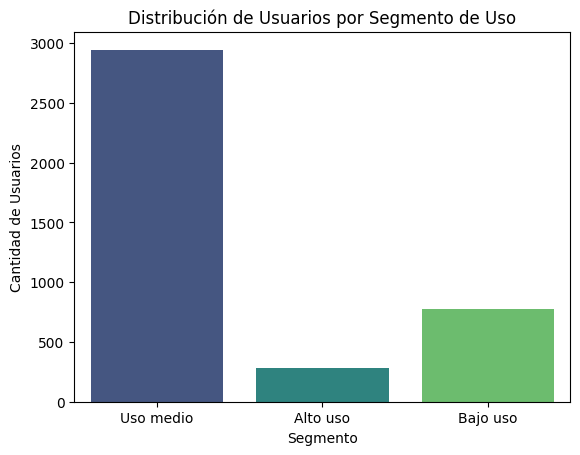

In [210]:
# Visualización de los segmentos por uso
sns.countplot(
    data=user_profile,
    x='grupo_uso',
    palette='viridis'
)

plt.title('Distribución de Usuarios por Segmento de Uso')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Usuarios')

plt.show()

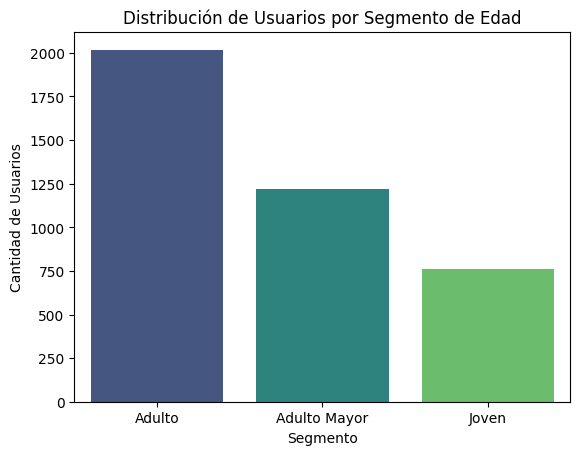

In [211]:
# Visualización de los segmentos por edad
sns.countplot(
    data=user_profile,
    x='grupo_edad',
    palette='viridis'
)

plt.title('Distribución de Usuarios por Segmento de Edad')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Usuarios')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**
Los datos originales venian con varios problemas, principalmente la falta de datos en columnas calve o el cambio de los datos por sentinels, principalemtene en las columnas city con un 11.7% de NAN y churn_date con un 88.3% de NAN donde es preferible eliminar la columna por la falta de informacion relevante para el analisis, tambien las columnas duration y length que se ven como valores faltantes pero son valores faltantes logicos al ser excluyentes.
Se puede evidenciar que el core de segmento de los clientes es Adultos de Uso medio donde se ve una gran cantidad de usuarios, pero en el atributo de uso se ve una total dominancia de un uso medio, mientras que en el atributo de edad no hay absoluta dominancia.
Por su parte los outliers detectados reflejan un uso poco usal que se evidencia en los segmentos y que tambien permiten evidenciar un comportamiento normal, sin embargo en la duracion de llamadas telefonicas existen muchos outliers que se podrian imputar con una IQR extremo (*3) para evita perder el foco y mantener la importancia de esas personas.

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Presencia de Outliers: Los outliers presentes en la duracion de las llamadas telefonicas genran ruido a la hora de identificar medidas correctas.
- Sentinels no mencionados: Al no mencionar los sentinels esperados se realizo una busqueda unica de valores que realientixo el proceso.


🔍 **Segmentos por Edad**
- Distribución: Los usuarios no presentan un aumento o disminucion por la edad, por lo que se puede ver un comportamiento parejo entre los 20 y los 80 años con picos en los 20, 47 y 77 años.
- Relación con el Plan: No existe una diferencia de edad clara entre ambos planes lo que sugiere que simplemente cambia el numero de usuarios por tipo de plan y no depende de la edad.
- Segmentos: Al dividir la edades en 3 grupos segun su poder adquisitivo se puede evidenciar que la mayoria de los usuarios se encuentran en el grupo de adultos que comprende desde los 30 a los 60 años.


📊 **Segmentos por Nivel de Uso**
- Composición: La mayoría de la base de usuarios cae en la categoría de Uso medio catalogado por tener mas de 5 y menos de 10 llamadas y mensajes, mientras que el segmento de "Alto uso" representa una minoría la cual hace parte de los outliers detectados anteriormente.
- Intensidad: Existe un grupo de usuarios que superan por mucho los límites teóricos de mensajes y llamadas calculados por lo que se debe analizar si se deben tomar medidas diferentes para sacrles provecho o mantener los planes igual.

Esto sugiere que la fuerza de marketing debe establecer su foco en el segmento de adultos con uso medio siendo este el core de la empresa, tambien se deben plantear estrategias de incentivos a un nuevo plan que permita mejorar las condiciones de los usos excesivos y asi captar mayores ingresos por parte de los usuarios que se salen de los maximos esperados, tambien se deberia implementar un unico sistema de sentinels que sea de uso general para evitar busquedas que desperdicien el tiempo de los trabajadores.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`